#Importing Relevent Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

## Generate sample sales data for the task

In [5]:
np.random.seed(0)
dates = pd.date_range('2022-01-01', periods=100)
regions = np.random.choice(['North', 'South', 'East', 'West'], size=100)
products = np.random.choice(['Product A', 'Product B', 'Product C'], size=100)
sales = np.random.randint(1000, 5000, size=100)

sales_data = pd.DataFrame({
    'Date': dates,
    'Region': regions,
    'Product': products,
    'Sales': sales
})

# Line Chart for Total Sales Over Time

In [6]:
def plot_total_sales_over_time():
    plt.figure(figsize=(10, 5))
    total_sales_by_date = sales_data.groupby('Date')['Sales'].sum()
    plt.plot(total_sales_by_date, marker='o', linestyle='-', color='b')
    plt.title('Total Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

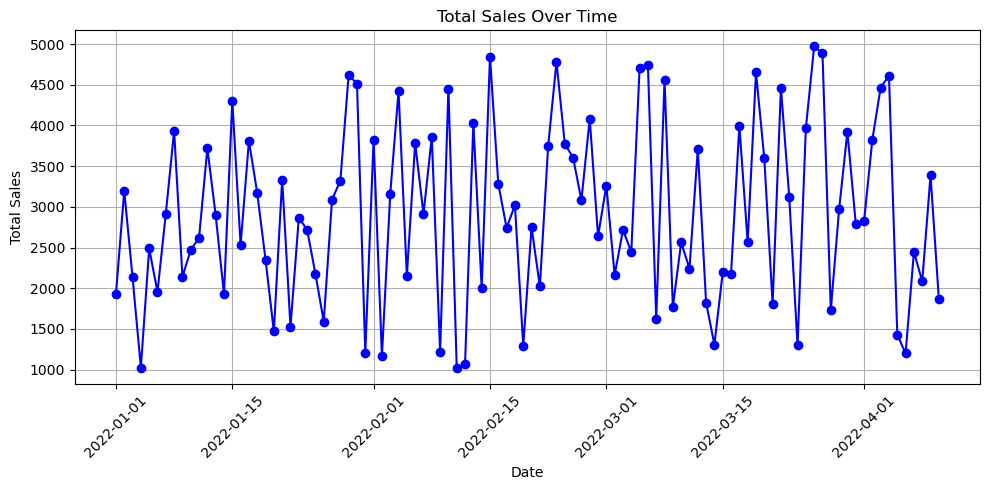

In [7]:
plot_total_sales_over_time()

#### Bar Chart to Compare Sales Across Different Regions

In [8]:
def plot_sales_by_region():
    plt.figure(figsize=(10, 5))
    sales_by_region = sales_data.groupby('Region')['Sales'].sum()
    sales_by_region.plot(kind='bar', color='c')
    plt.title('Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

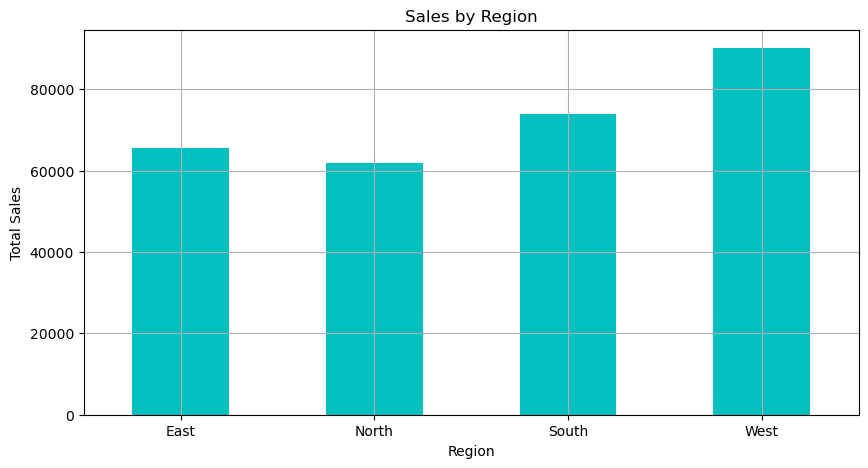

In [9]:
plot_sales_by_region()

# Pie Chart for Product Distribution

In [10]:
def plot_product_distribution():
    plt.figure(figsize=(7, 7))
    sales_by_product = sales_data.groupby('Product')['Sales'].sum()
    plt.pie(sales_by_product, labels=sales_by_product.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Sales by Product')
    plt.show()

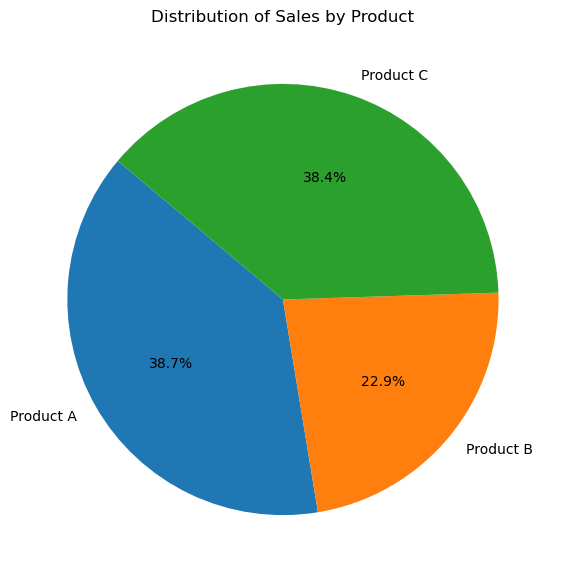

In [11]:
plot_product_distribution()

# Summary Table of Key Metrics

In [12]:
def display_summary_table():
    total_sales = sales_data['Sales'].sum()
    average_sales = sales_data['Sales'].mean()
    summary_table = pd.DataFrame({
        'Metric': ['Total Sales', 'Average Sales'],
        'Value': [total_sales, average_sales]
    })
    return summary_table

In [13]:
display_summary_table()

,Metric,Value
0,Total Sales,291551.00
1,Average Sales,2915.51


#Display The Interactive Dashboard

In [14]:
def interactive_dashboard(region=None, product=None):
    df = sales_data
    if region:
        df = df[df['Region'] == region]
    if product:
        df = df[df['Product'] == product]

    plt.figure(figsize=(10, 5))
    total_sales_by_date = df.groupby('Date')['Sales'].sum()
    plt.plot(total_sales_by_date, marker='o', linestyle='-', color='b')
    plt.title(f'Total Sales Over Time - Filtered by {region or "All Regions"} & {product or "All Products"}')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [15]:
interact(interactive_dashboard,
         region=Dropdown(options=['All'] + list(sales_data['Region'].unique()), value='All'),
         product=Dropdown(options=['All'] + list(sales_data['Product'].unique()), value='All'))

interactive(children=(Dropdown(description='region', options=('All', 'North', 'West', 'South', 'East'), value=…

<function __main__.interactive_dashboard(region=None, product=None)>